# Ciencia de datos en finanzas cuantitativas
### Examen clase 1 y 2:

El objetivo es llenar con código todas las celdas comentadas en este Notebook. 

Clase 1:
Se pretende el entendimiento del cómputo de tasa de retorno a la madurez y la tasa implícita de futuros.

## Examen clase 1:

#### Tasa de retorno a la madurez:

In [3]:
# CELDA 1:
# Objetivo de esta celda: Crear una función que, dado una tasa anualizada porcentual y una fecha, compute 
# el precio del bono AY24 para esa fecha.


## Para ello hay que entender la sección de Bonos (Activos Financieros) de la clase 1.
## Será necesario utilizar los flujos de fondos del bono. Lo pueden encontrar en la Hoja1 del excel ay24.xlsx .

import datetime
from dateutil.parser import parse
import math

desc = [
    {'date': datetime.date(2018,11,7), 'prop': 0.46, 'cfi': 4.38},
    {'date': datetime.date(2019,5,7), 'prop': 0.96, 'cfi': 21.04},
    {'date': datetime.date(2019,11,7), 'prop': 1.46, 'cfi': 3.65},
    {'date': datetime.date(2020,5,7), 'prop': 1.96, 'cfi': 20.31},
    {'date': datetime.date(2020,11,7), 'prop': 2.46, 'cfi': 2.92},
    {'date': datetime.date(2021,5,7), 'prop': 2.96, 'cfi': 19.58},
    {'date': datetime.date(2021,11,7), 'prop': 3.46, 'cfi': 2.19},
    {'date': datetime.date(2022,5,7), 'prop': 3.96, 'cfi': 18.85},
    {'date': datetime.date(2022,11,7), 'prop': 4.46, 'cfi': 1.46},    
    {'date': datetime.date(2023,5,7), 'prop': 4.96, 'cfi': 18.12},
    {'date': datetime.date(2023,11,7), 'prop': 5.46, 'cfi': 0.73},
    {'date': datetime.date(2024,5,7), 'prop': 5.96, 'cfi': 17.43},
]

def get_price_ay24(rate, date):
        p = 0
        dt = parse(date)
        y = rate/100

        for item in desc:
            if item.get('date') >= dt.date():
                p += item.get('cfi') / math.pow((1 + y),item.get('prop'))
        return p

In [29]:
import scipy.optimize as optimize

# CELDA 2:
# Objetivo de esta celda: Crear una función que, dado un precio y una fecha, compute una tasa anualizada porcentual
# del bono AY24 para esa fecha.

# Para ello hay que usar la función de la CELDA 1 y el optimizador optimize.newton(...) de scipy con el
# fin de encontrar la tasa anualizada tal que al evaluar la función de la CELDA 1 de el precio de input.

def compute_rate(price, date):    
    a = optimize.newton(return_price_ay24, price,args=(date))
    print(a)

compute_rate(3.45,'14/8/2018')

TypeError: return_price_ay24() takes 2 positional arguments but 10 were given

In [27]:
# CELDA 3:
# Objetivo de esta celda: Computar el precio del AY24 del día 14/8/2018 con tasa de retorno a la madurez anualizada de 11,93%.
price_ay24 = return_price_ay24(11.93, '14/8/2018')
print(price_ay24)

92.74939855272626


In [ ]:
# CELDA 4:
# Objetivo de esta celda: Computar la tasa de retorno a la madurez del AY24 del día 31/8/2018 con precio 95,85 (U$S).
rate_ay24 = compute_rate(95.85, '31/8/2018')
print(rate_ay24)

#### Tasa implícita anualizada de futuros:

In [75]:
# CELDA 5:
# Objetivo de esta celda: De http://www.rofex.com.ar/cem/FyO.aspx extraer manualmente los datos necesarios para crear
# un array con los precios de los dólares futuros de los días 31/08/2018 y 3/8/2018. Nos interesa los productos: 
# [DLR082018,DLR092018,DLR102018,DLR112018,DLR122018,DLR012019,DLR022019]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

dlr_result = []

dates = ['31/08/2018', '30/09/2018', '31/10/2018', '30/11/2018', '31/12/2018', '31/01/2019', '28/02/2019']

x_axis = [datetime.strptime(d,'%d/%m/%Y').date() for d in dates]

dlr_primero = [
    {'id': 'DLR082018', 'due_date': '31/08/2018','price_now':28.300, 'price_future':28.060},
    {'id': 'DLR092018', 'due_date': '30/09/2018','price_now':29.000, 'price_future':28.845},
    {'id': 'DLR102018', 'due_date': '31/10/2018','price_now':29.820, 'price_future':29.785},
    {'id': 'DLR112018', 'due_date': '30/11/2018','price_now':30.685, 'price_future':30.700},
    {'id': 'DLR122018', 'due_date': '31/12/2018','price_now':31.500, 'price_future':31.500},
    {'id': 'DLR012019', 'due_date': '31/01/2019','price_now':32.400, 'price_future':32.290},
    {'id': 'DLR022019', 'due_date': '28/02/2019','price_now':33.200, 'price_future':33.110}
]

dlr_segundo = [
    {'id': 'DLR082018', 'due_date': '31/08/2018','price_now':39.500, 'price_future':37.300},
    {'id': 'DLR092018', 'due_date': '30/09/2018','price_now':40.100, 'price_future':38.150},
    {'id': 'DLR102018', 'due_date': '31/10/2018','price_now':42.000, 'price_future':39.500},
    {'id': 'DLR112018', 'due_date': '30/11/2018','price_now':41.750, 'price_future':41.000},
    {'id': 'DLR122018', 'due_date': '31/12/2018','price_now':44.000, 'price_future':42.010},
    {'id': 'DLR012019', 'due_date': '31/01/2019','price_now':46.000, 'price_future':43.500},
    {'id': 'DLR022019', 'due_date': '28/02/2019','price_now':46.500, 'price_future':45.350}
]

def get_delta_time(date_current, due_date):
    due = datetime.strptime(due_date, '%d/%m/%Y')
    current = datetime.strptime(date_current, '%d/%m/%Y')
    return (( due - current ).days / 365)

def get_implicit_rate(date):
    rate_result = []

    if date == '3/08/2018':
        dlr_data = dlr_primero
    else:
        dlr_data = dlr_segundo
    
    for dlr in dlr_data:
        exp = get_delta_time( date, dlr.get('due_date') )
        quot_price = dlr.get('price_now') / dlr.get('price_future')
        res = pow(quot_price, exp)
        rate_result.append( res - 1 )

    return rate_result

[0.0006535516617360848, 0.0008519556180632826, 0.0002864011276555445, -0.0001593230094776299, 0.0, 0.0016878658120365042, 0.0015555527063650931]


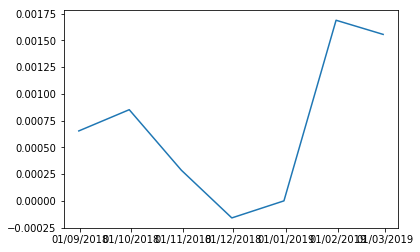

In [76]:
# CELDA 6:
# Objetivo de esta celda: Computar la tasa implícita anualizada de los dólares futuros del día 31/08/2018. Graficar.

# Tener en cuenta que los vencimientos de los futuros son el último día del mes. EJ DLR012019 vence el 31/1/2019.

y_axis = get_implicit_rate('3/08/2018')
print(r)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.plot(x_axis, y_axis)

In [ ]:
# CELDA 7:
# Objetivo de esta celda: Computar la tasa implícita anualizada de los dólares futuros del día 3/8/2018. Graficar.

## Examen clase 2:

In [ ]:
# CELDA 8:
# Objetivo de esta celda: Cargar el pickle '\DiploDatos\Clase 2\Database\Nasdaq_sotck.pk'

# https://docs.python.org/3/library/pickle.html
# Esta base de datos son precios ajustados de Nasdaq 100. Son ajustados porque omiten dividendos, para
# no tener salto en precios imposibles de entender por un autoencoder.
# Tener en cuenta que SIEMPRE hay que usar precios ajustados por dividendos al hacer cualquier autoencoder o regresor
# sobre acciones.

In [ ]:
# CELDA 9:
# Objetivo de esta celda: Imprimir las columnas de la base de datos.

In [ ]:
# CELDA 10:
# Objetivo de esta celda: Graficar la serie histórica de precio ajustado de Apple ('AAPL').

In [ ]:
# CELDA 11:
# Objetivo de esta celda: Estandarizar todas las series históricas ajustadas de precios de todas las acciones de Nasdaq 100.
# Puede ser manualmente o utilizar StandardScaler de sk-learn.

In [ ]:
# CELDA 12:
# Objetivo de esta celda: Crear una función cuyo input es un entero 'dim_neuron' y el output es un modelo autoencoder.
# Modelo autoencoder output:
# (encoder)
# Input@ 95
# Dense@ dim_neuron+relu
# Dense@ 10+linear
# (decoder)
# Dense@ dim_neuron+relu
# Dense@ 95+linear
# loss: mse

In [ ]:
# CELDA 13:
# Objetivo de esta celda: Hacer validación cruzada para determinar los epochs y dim_neuron.
# Hay que usar TimeSeriesSplit(100) pero hacer validación cruzada sólo sobre los últimos 10 segmentos.

# Puede utilizar tanto KerasRegressor+GridSearchCV como loops anidados.
# HINT 1: Si se usa loops anidados hay que reinicializar cada modelo antes de hacer .fit .
# HINT 2: Hay codigo suficiente en las filminas de la clase como para poder realizar este paso.

In [ ]:
# CELDA 14:
# Objetivo de esta celda: Entrenar un autoencoder con la mejor hiperparametrización obtenida en la celda 13 y
# con datos de validación.
# Dejar fuera del entrenamiento los últimos 66 días de datos, los cuales utilizaremos como conjunto de validación.

In [ ]:
# CELDA 15:
# Objetivo de esta celda: Usando el modelo de la CELDA 14, graficar el espacio latente sobre la totalidad de los datos.

In [ ]:
# CELDA 16:
# Objetivo de esta celda: VALIDACIÓN CRUZADA DE UN DENOISING AUTOENCODER.
# Hacer validación cruzada para determinar los epochs y dim_neuron de un DENOISING AUTOENCODER.
# El modelo es el definido en 12.
# Hay que usar TimeSeriesSplit(100) pero hacer validación cruzada sobre los ultimos 10 segmentos.
# Por cada dato a partir del dato 91 introducir 30 veces ruido a la muestra de input de entrenamiento. Para cada acción el ruido
# es sumar un número aleatorio de una normal con desviación estándar igual a los 90 días anteriores de dicha acción.
# Es decir que cada dato a partir del dato 91 será utilizado 30 veces para entrenar (agregando ruido).
# Los datos en el conjunto de validación NO deben tener ruido.

In [ ]:
# CELDA 17:
# Objetivo de esta celda: Entrenar un DENOISING AUTOENCODER con la mejor hiperparametrización obtenida en la celda 16 y
# con datos de validación.
# Dejar fuera del entrenamiento los últimos 66 días de datos, los cuales utilizaremos como conjunto de validación.
# Recordamos que para ser un DENOISING AUTOENCODER hay que introducir ruido a cada elemento de entrenamiento,
# similar a la CELDA 16.
# Los datos en el conjunto de validación NO deben tener ruido.

In [ ]:
# CELDA 18:
# Objetivo de esta celda: Usando el modelo de la CELDA 17, graficar el espacio latente sobre
# la totalidad de los datos (sin ruido).

In [ ]:
# CELDA 19:
# Objetivo de esta celda: Repetir la función de CELDA 12 pero agregando DROPOUT:
# Modelo autoencoder output:
# (encoder)
# Input@ 95
# Dense@ dim_neuron+relu
# Dropout(0.2)
# Dense@ 10+linear
# (decoder)
# Dense@ dim_neuron+relu
# Dropout(0.2)
# Dense@ 95+linear
# loss: mse

In [ ]:
# CELDA 20:
# Objetivo de esta celda: Hacer validación cruzada como en CELDA 16 pero del modelo de CELDA 19.
# Es decir validación cruzada de un DENOISING AUTOENCODER con Dropout.

In [ ]:
# CELDA 21:
# Objetivo de esta celda: Entrenar un DENOISING AUTOENCODER con Dropout, usando la mejor hiperparametrización obtenida
# en la celda 20 y con datos de validación.
# Dejar fuera del entrenamiento los últimos 66 días de datos, los cuales utilizaremos como conjunto de validación.
# Recordamos que para ser un DENOISING AUTOENCODER hay que introducir ruido a cada elemento de entrenamiento,
# similar a la CELDA 16.
# Los datos en el conjunto de validación NO deben tener ruido.

In [ ]:
# CELDA 22:
# Objetivo de esta celda: Graficar el espacio latente sobre la totalidad de los datos (sin ruido).